# BTC-USD @5min

In [1]:
# PARAMS:
BC5M_FILENAME = './data_clean/btc.300s.cbpro.csv'
# TL;DR change params & Kernel > Restart & Run All to "run this like a script"

In [2]:
# autoreload
%load_ext autoreload
%autoreload 1
# write code that works in both Python 2 (2.7+) and 3 (3.5+)
from __future__ import absolute_import, division, print_function, unicode_literals
try:
    input = raw_input
    range = xrange
except NameError:
    pass

In [3]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

import pprint
pp = pprint.PrettyPrinter(indent=2).pprint
from IPython.display import display as dd
from IPython.display import Image

%matplotlib inline

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
%aimport lib.helpers
%aimport lib.etl
%aimport lib.visualization
%aimport lib.walk_forward_predict
%aimport models.rnn
%aimport models.lr
from lib.helpers import (
    timing, print_shapes, fix_all_rngs,
    date_str_to_ts
)
from lib.visualization import simple_plot
from lib.walk_forward_predict import (
    run_walk_forward_validation_rnn,
    run_walk_forward_validation_arima
)
import lib.etl as etl
from models.rnn import make_rnn_model_constructor
from models.lr import LRModel

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


> size: 387948


datetime    datetime64[ns]
low                float64
high               float64
open               float64
close              float64
volume             float64
dtype: object

datetime     low    high    open   close      volume
timestamp                                                                 
1422745200 2015-01-31 23:00:00  224.51  225.69  225.38  224.51   29.638700
1422745500 2015-01-31 23:05:00  224.00  225.59  224.62  224.00   52.189176
1422745800 2015-01-31 23:10:00  221.99  223.92  223.91  221.99   40.262566
1422746100 2015-01-31 23:15:00  218.00  222.00  222.00  218.00  163.490760
1422746400 2015-01-31 23:20:00  217.11  218.89  217.92  218.22   96.317898

datetime      low     high     open    close     volume
timestamp                                                                    
1539128100 2018-10-09 23:35:00  6590.30  6593.48  6591.54  6590.30  17.148190
1539128400 2018-10-09 23:40:00  6586.55  6590.31  6590.31  6589.30  15.269094
1539128700 2018-10-09 23:45:00  6589.29  6589.69  6589.30  6589.48  12.466310
1539129000 2018-10-09 23:50:00  6589.47  6592.81  6589.48  6591.85  14.972801
1539129300 2018-10-09 23:55:00  6589.47  6592.81  6591.84  6589.48  31.305392

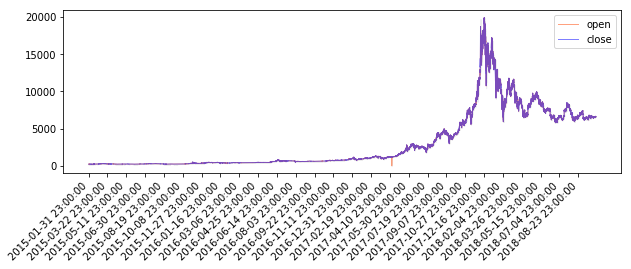

In [5]:
data5m = pd.read_csv(
    BC5M_FILENAME,
    index_col='timestamp',
    parse_dates=['datetime']
)
print('> size:', len(data5m))
dd(data5m.dtypes)
dd(data5m.head())
dd(data5m.tail())
simple_plot(data5m, xticks_span=30 * 24 * 60 // 3)

## Test runs (laptop)

### LR

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.580s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.023s to plot incremental predictions



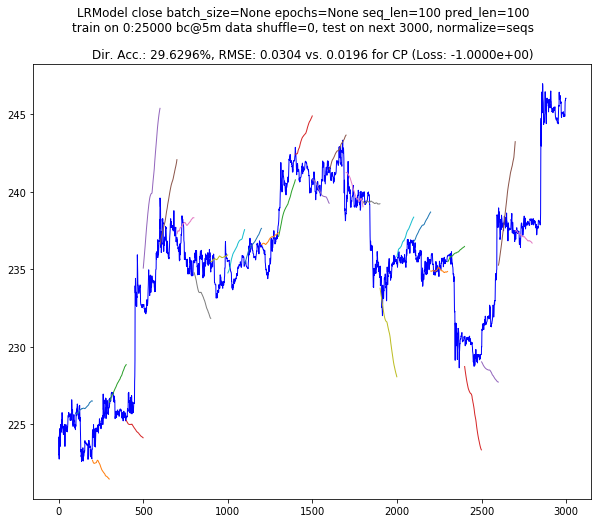

--- 0.928s to run experiment



In [20]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.547s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.022s to plot incremental predictions



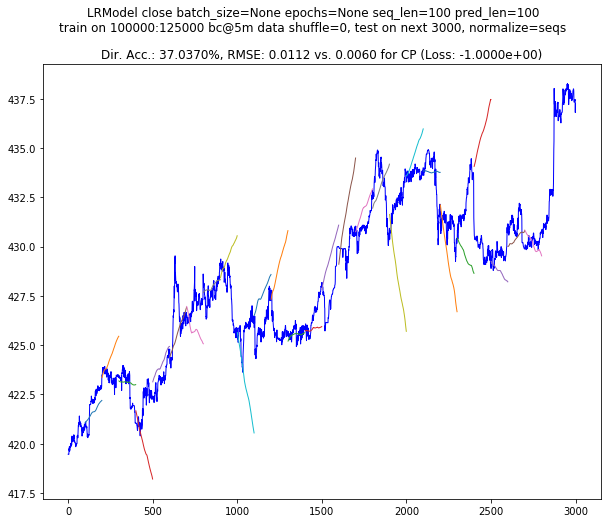

--- 0.890s to run experiment



In [25]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=100000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.589s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.023s to plot incremental predictions



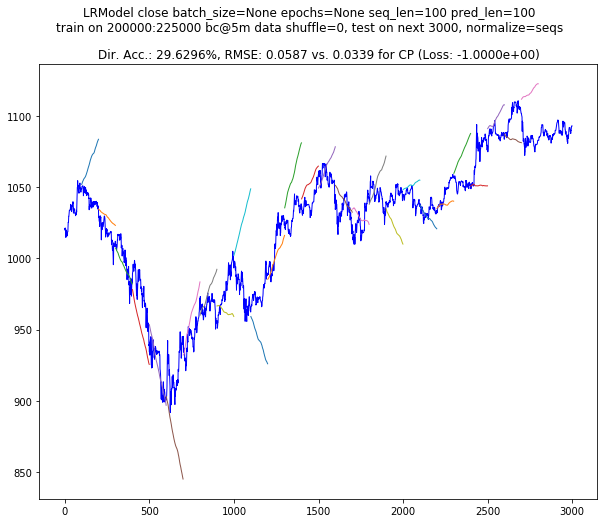

--- 0.963s to run experiment



In [17]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.000s to train model

--- 0.560s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.024s to plot incremental predictions



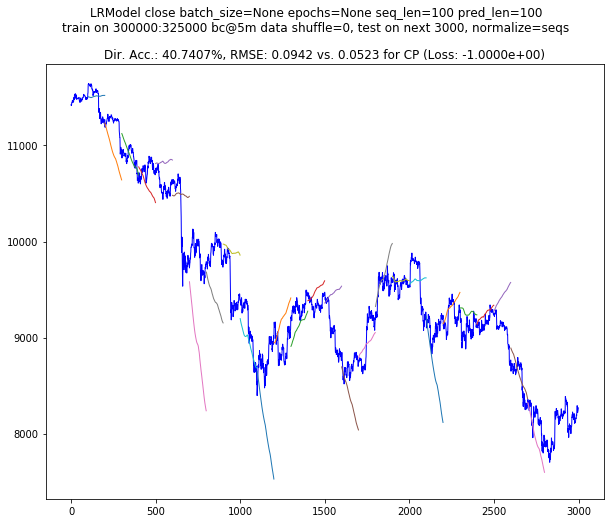

--- 0.894s to run experiment



In [21]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=300000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=LRModel,
        # training:
        epochs=None,
        batch_size=None,
        shuffle=False,
        # experiment setup:
        times=1,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

**LR Model conclusion:** Significantly worse than random guessing at direction prediction. Significantly higher RMSE than constant prediction. This model is obviously not adequate for this type of data.

### ARIMA

In [18]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA

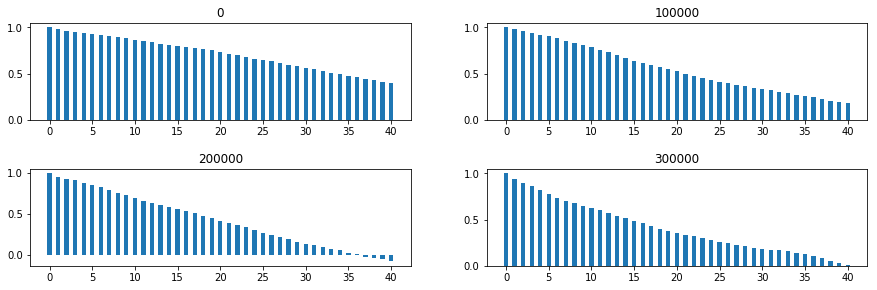

In [34]:
plt.figure(figsize=(15, 5), facecolor='white')
plt.subplots_adjust(top=0.8, hspace=0.5)
for i, n in enumerate([0, 100000, 200000, 300000]):
    plt.subplot(2, 2, i + 1)
    plt.title(str(n))
    data_acf = acf(data5m[n: n + 300]['close'].values)
    plt.bar(np.arange(len(data_acf)), data_acf, width=0.5)

**Conclusion:** looks like an AR process (cannot exclude an MA component though).

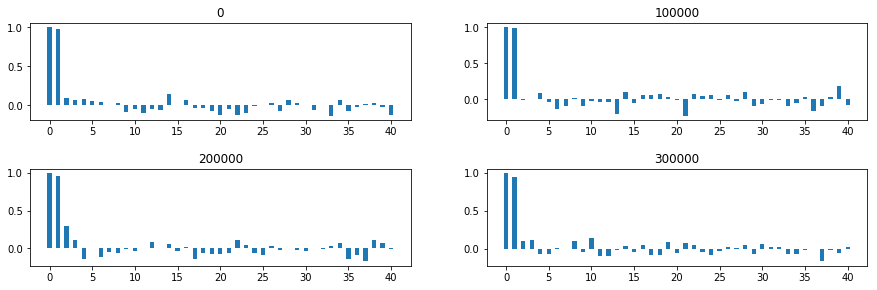

In [35]:
plt.figure(figsize=(15, 5), facecolor='white')
plt.subplots_adjust(top=0.8, hspace=0.5)
for i, n in enumerate([0, 100000, 200000, 300000]):
    plt.subplot(2, 2, i + 1)
    plt.title(str(n))
    data_pacf = pacf(data5m[n: n + 300]['close'].values)
    plt.bar(np.arange(len(data_pacf)), data_pacf, width=0.5)

**Conclusion:** AR(2), maybe AR(3).

Worth trying:
- (2, 0, 0) !
- (2, 1, 0)
- (2, 0, 1) !
- (2, 0, 2)
- (3, 0, 0)
- (3, 0, 1)

/home/neuronq/miniconda3/envs/fucap/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


--- 418.688s to run experiment



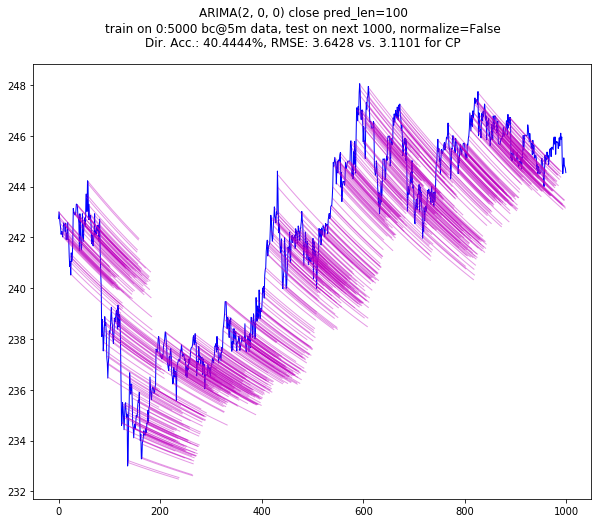

In [41]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 0),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/neuronq/miniconda3/envs/fucap/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


--- 1421.849s to run experiment



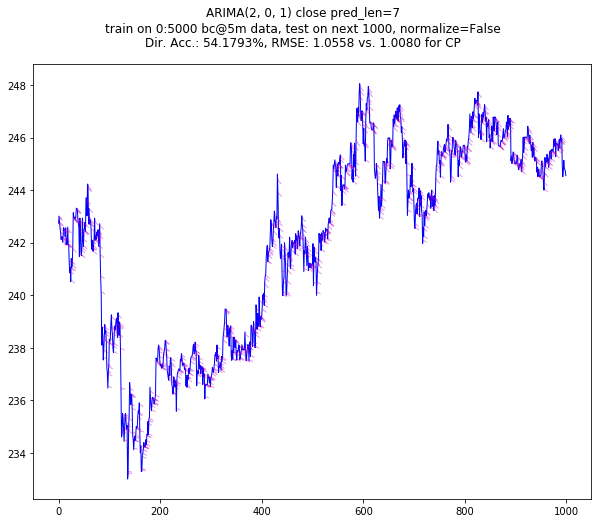

In [42]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 1),
        pred_len=7,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

### LSTM

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.014s to model compilation time


--- Created model id: 139893066300944
Tensor("lstm_5_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

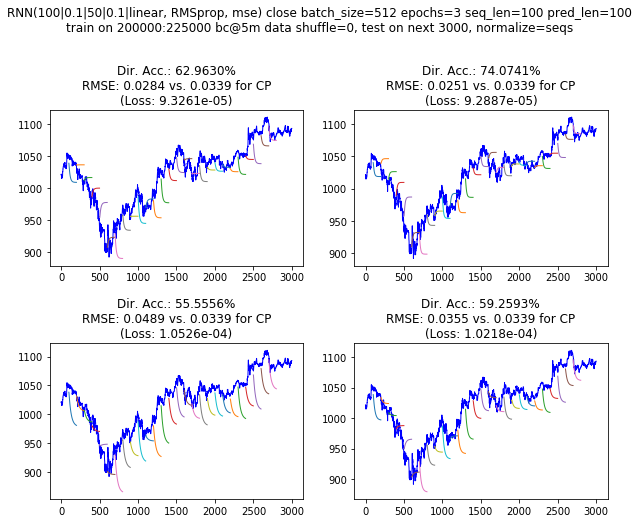

--- 589.297s to run experiment



In [15]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

## Test runs (server)

### ARIMA

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


--- 237.398s to run experiment



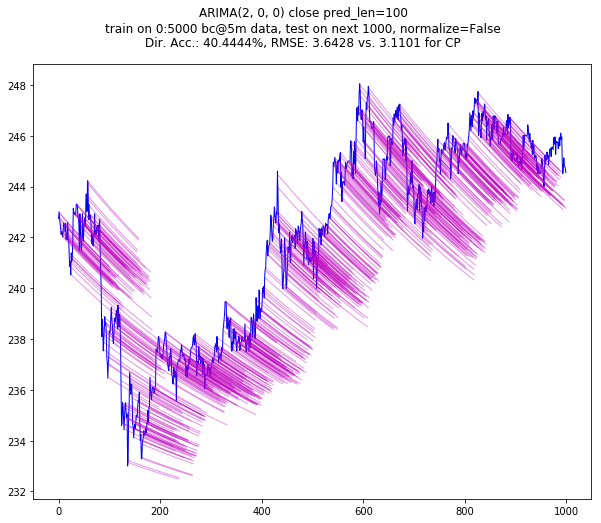

In [6]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 0),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered 

--- 1009.586s to run experiment



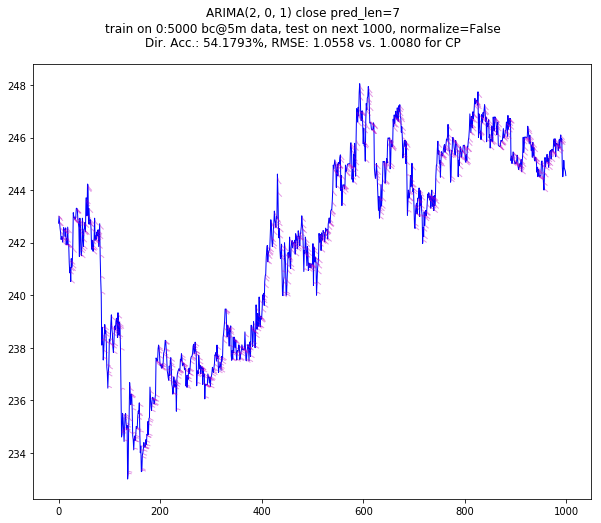

In [7]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 1),
        pred_len=7,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


--- 913.248s to run experiment



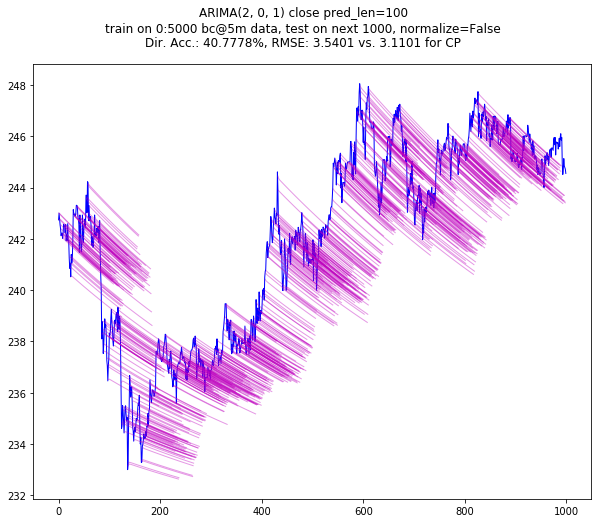

In [8]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 1),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

--- 499.954s to run experiment



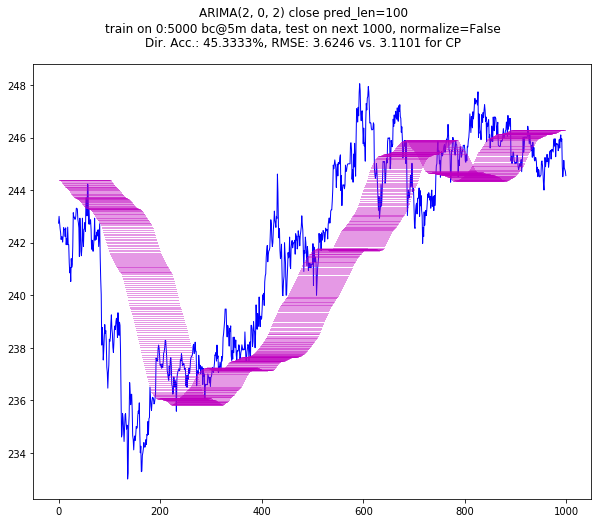

In [9]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 0, 2),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

--- 1445.477s to run experiment



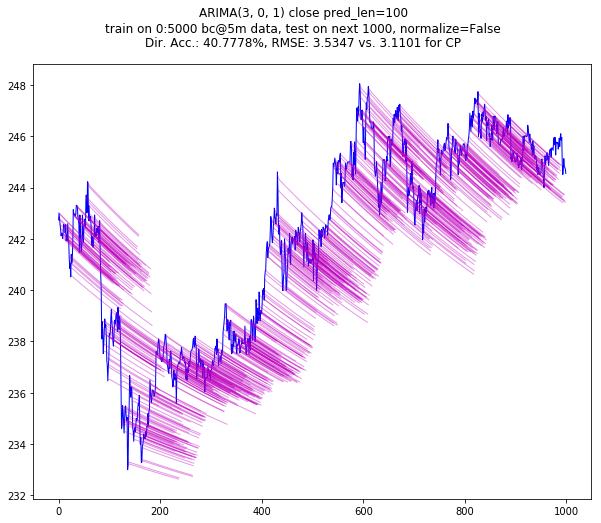

In [10]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(3, 0, 1),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


--- 69.034s to run experiment



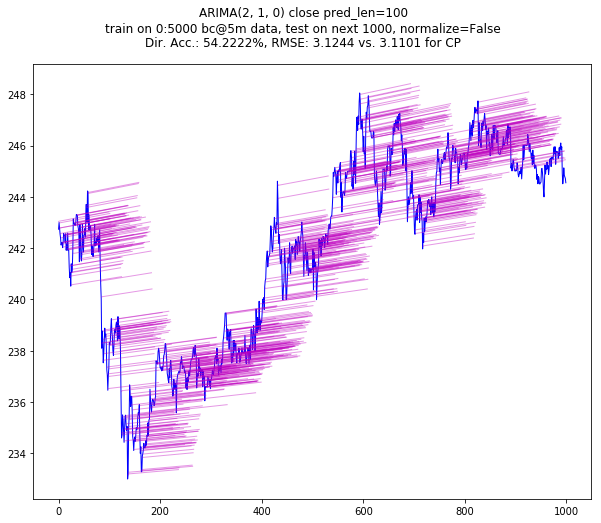

In [6]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 1, 0),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

--- 650.821s to run experiment



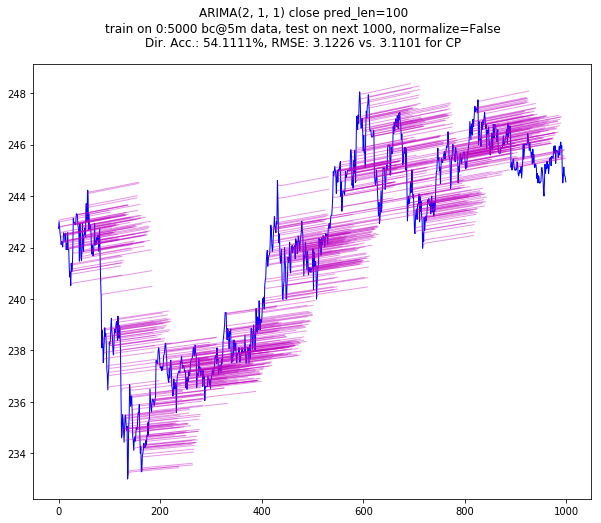

In [7]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(2, 1, 1),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

--- 28.416s to run experiment



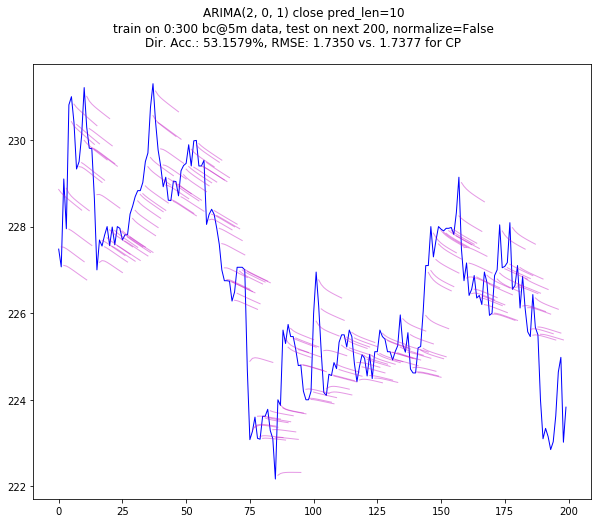

In [10]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=300,
        test_sz=200,
        # data processing:
        normalize=False,
        order=(2, 0, 1),
        pred_len=10,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

--- 64.406s to run experiment



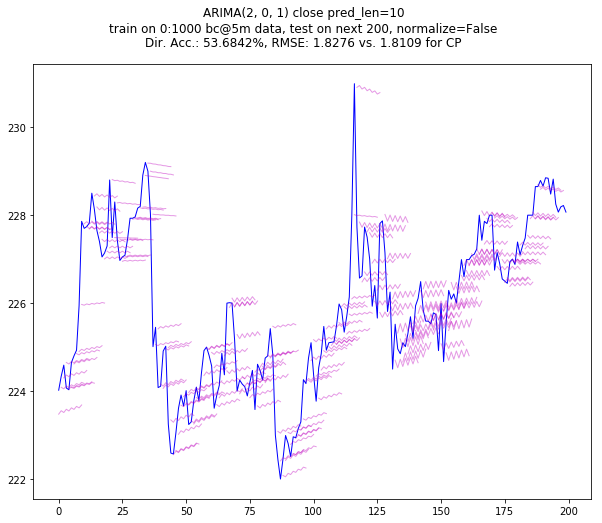

In [11]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=1000,
        test_sz=200,
        # data processing:
        normalize=False,
        order=(2, 0, 1),
        pred_len=10,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/tsa/tsatools.py:628: RuntimeWar

--- 92.384s to run experiment



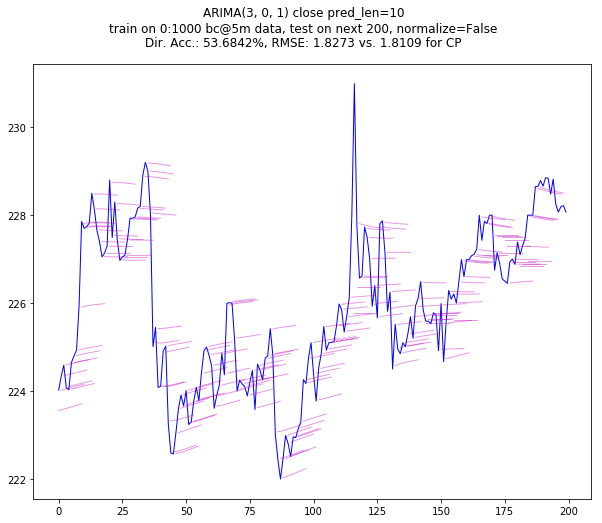

In [13]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=1000,
        test_sz=200,
        # data processing:
        normalize=False,
        order=(3, 0, 1),
        pred_len=10,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

--- 125.831s to run experiment



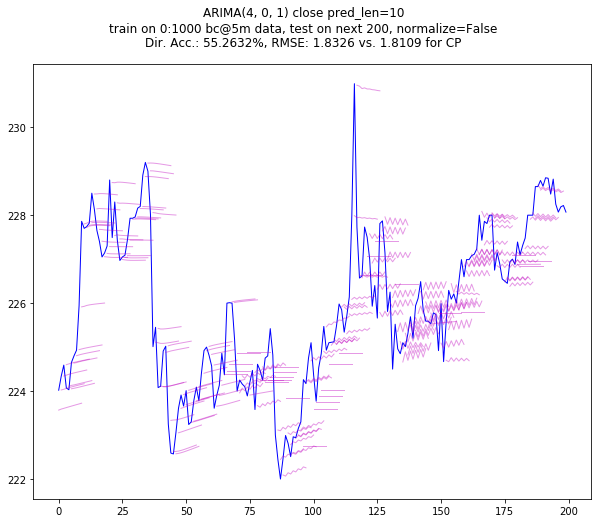

In [14]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=1000,
        test_sz=200,
        # data processing:
        normalize=False,
        order=(4, 0, 1),
        pred_len=10,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

--- 93.453s to run experiment



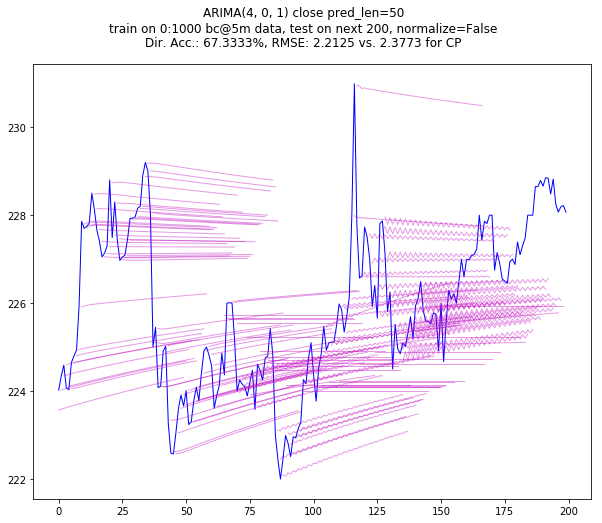

In [16]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=1000,
        test_sz=200,
        # data processing:
        normalize=False,
        order=(4, 0, 1),
        pred_len=50,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

--- 58.255s to run experiment



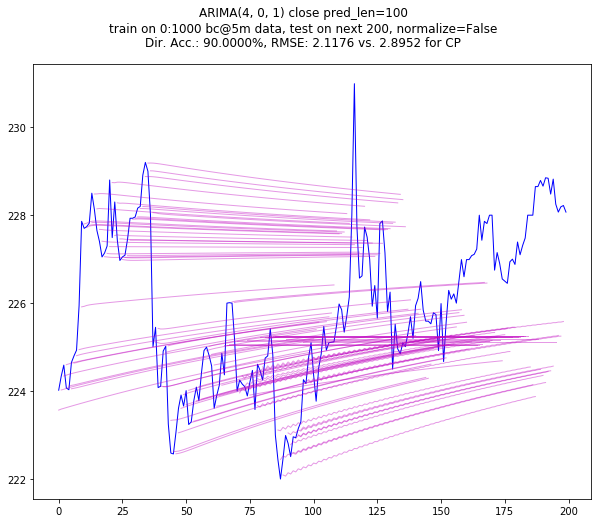

In [17]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=1000,
        test_sz=200,
        # data processing:
        normalize=False,
        order=(4, 0, 1),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/paperspace/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/base/mo

--- 1306.010s to run experiment



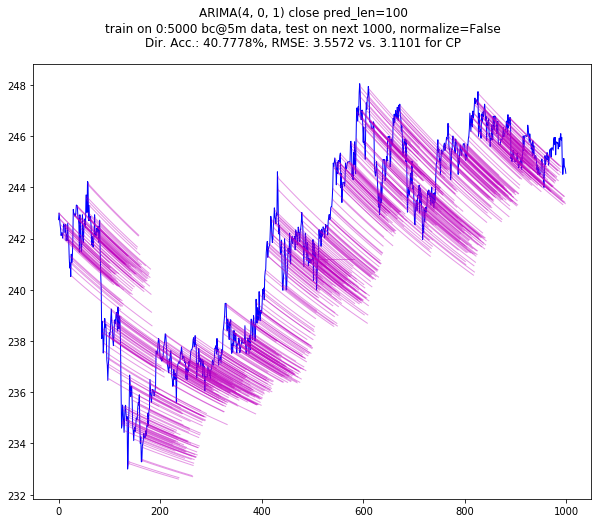

In [18]:
with timing('run experiment'):
    run_walk_forward_validation_arima(
        # data to extract:
        data5m,
        features=['close'],
        from_i=0,
        train_sz=5000,
        test_sz=1000,
        # data processing:
        normalize=False,
        order=(4, 0, 1),
        pred_len=100,
        skip=False,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
    )

### LSTM

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.014s to model compilation time


--- Created model id: 139965580952144
Tensor("lstm_1_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

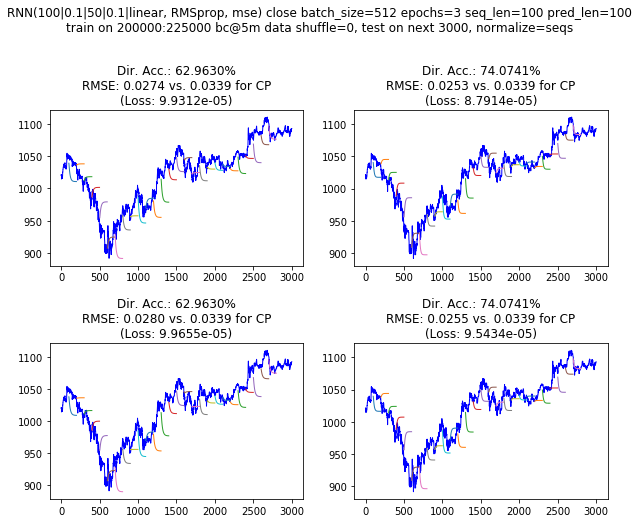

--- 184.504s to run experiment



In [7]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (55000, 1)
train_sz = 50000

seqs ~ (54899, 101, 1)
--- 0.017s to model compilation time


--- Created model id: 140358740704912
Tensor("lstm_7_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

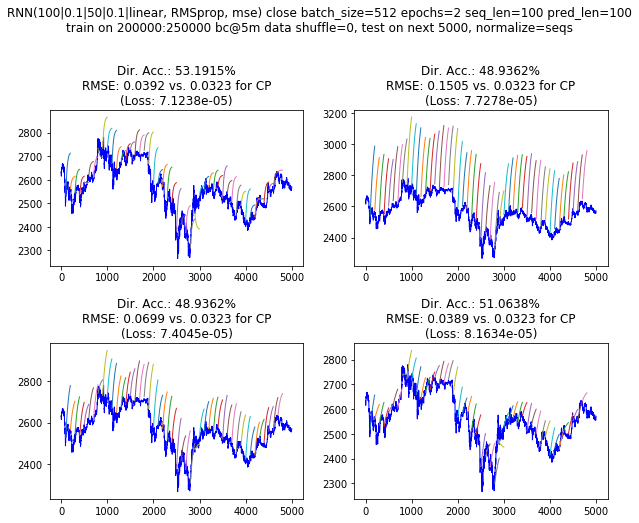

--- 274.953s to run experiment



In [9]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=5000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=2,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (55000, 1)
train_sz = 50000

seqs ~ (54899, 101, 1)
--- 0.018s to model compilation time


--- Created model id: 140356326603472
Tensor("lstm_15_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_15 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

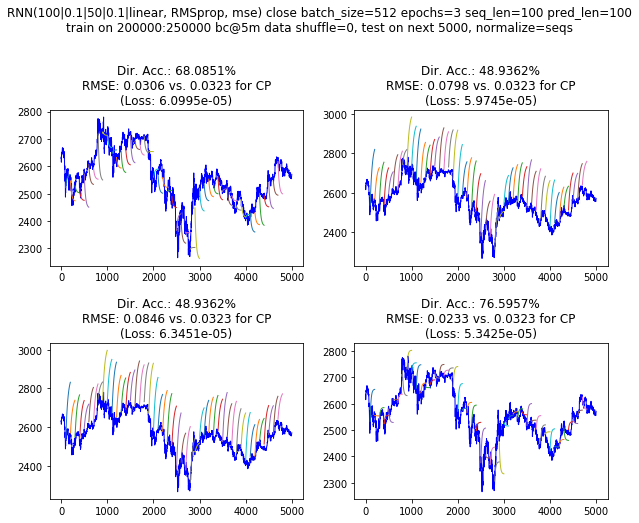

--- 399.827s to run experiment



In [10]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=5000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (55000, 1)
train_sz = 50000

seqs ~ (54899, 101, 1)
--- 0.016s to model compilation time


--- Created model id: 140356282340496
Tensor("lstm_23_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

--- 171.346s to train model

--- 12.247s to walk and predict

### pred_seqs: len=47, shape=(100,)
--- 0.061s to plot incremental predictions



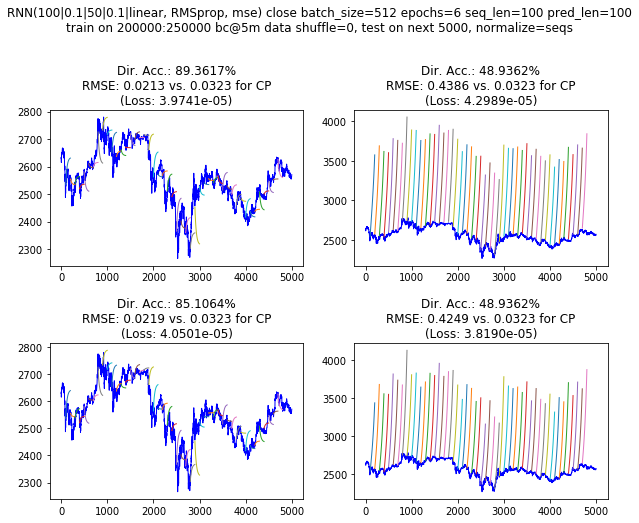

--- 732.869s to run experiment



In [11]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=5000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=6,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (55000, 1)
train_sz = 50000

seqs ~ (54899, 101, 1)
--- 0.018s to model compilation time


--- Created model id: 140356192734992
Tensor("lstm_31_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_31 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_32 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

47404/47404 [==============================] - 31s 664us/step - loss: 1.8911e-04 - val_loss: 1.0061e-04
Epoch 2/8
47404/47404 [==============================] - 27s 569us/step - loss: 7.8155e-05 - val_loss: 1.1048e-04
Epoch 3/8
47404/47404 [==============================] - 27s 562us/step - loss: 5.6851e-05 - val_loss: 7.1697e-05
Epoch 4/8
47404/47404 [==============================] - 27s 567us/step - loss: 4.8704e-05 - val_loss: 5.6188e-05
Epoch 5/8
47404/47404 [==============================] - 27s 574us/step - loss: 4.2306e-05 - val_loss: 5.2992e-05
Epoch 6/8
47404/47404 [==============================] - 27s 568us/step - loss: 3.7139e-05 - val_loss: 6.1263e-05
Epoch 7/8
47404/47404 [==============================] - 27s 573us/step - loss: 3.1776e-05 - val_loss: 3.1007e-05
Epoch 8/8
47404/47404 [==============================] - 27s 570us/step - loss: 3.0204e-05 - val_loss: 9.9400e-05
--- 221.374s to train model

--- 11.871s to walk and predict

### pred_seqs: len=47, shape=(100,)


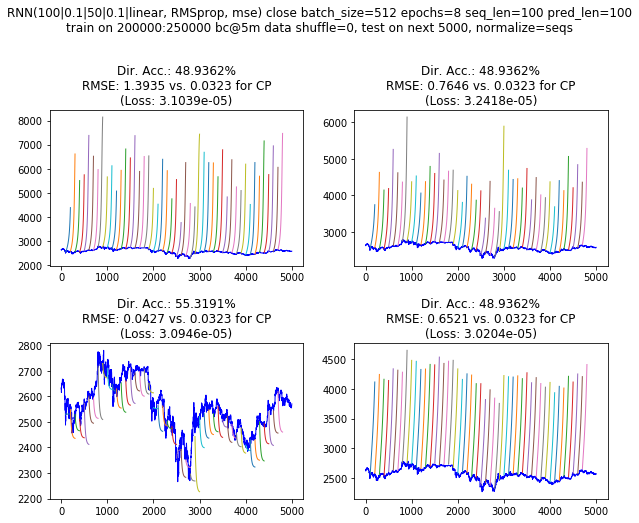

--- 952.988s to run experiment



In [12]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=5000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=8,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (55000, 1)
train_sz = 50000

seqs ~ (54899, 101, 1)
--- 0.016s to model compilation time


--- Created model id: 140680031464912
Tensor("lstm_1_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

--- 10.969s to walk and predict

### pred_seqs: len=47, shape=(100,)
--- 0.057s to plot incremental predictions



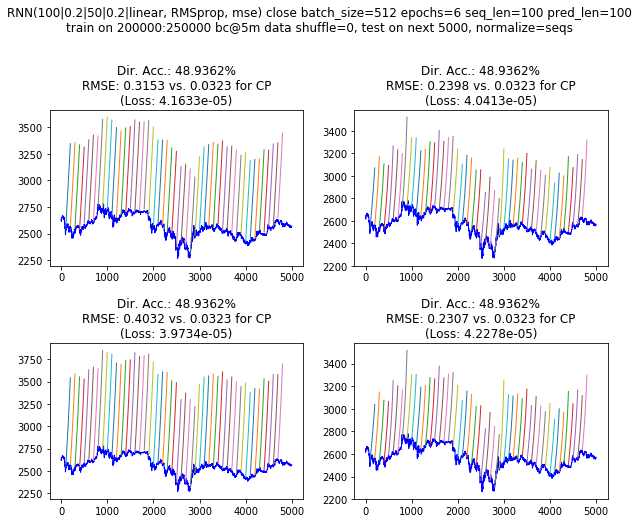

--- 696.157s to run experiment



In [6]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=5000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.2, 50, 0.2]),
        # training:
        epochs=6,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (55000, 1)
train_sz = 50000

seqs ~ (54899, 101, 1)
--- 0.017s to model compilation time


--- Created model id: 140679840653264
Tensor("lstm_11_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

--- 162.992s to train model

--- 10.951s to walk and predict

### pred_seqs: len=47, shape=(100,)
--- 0.529s to plot incremental predictions



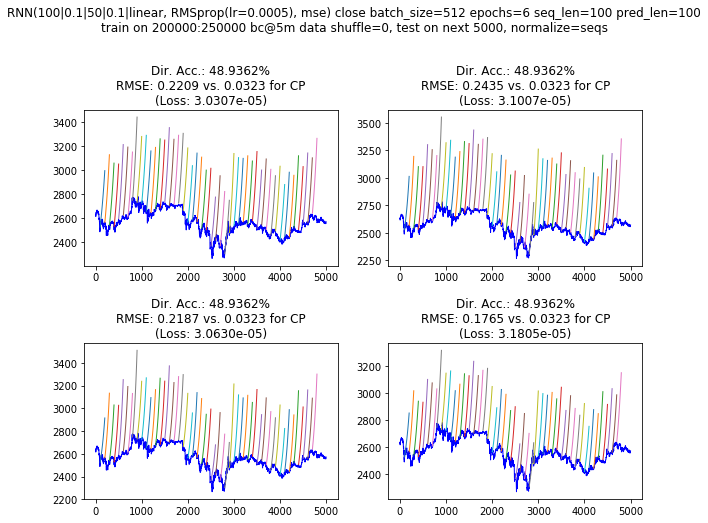

--- 698.727s to run experiment



In [8]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=5000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1], lr=5e-4),
        # training:
        epochs=6,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.018s to model compilation time


--- Created model id: 140443472448592
Tensor("lstm_1_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

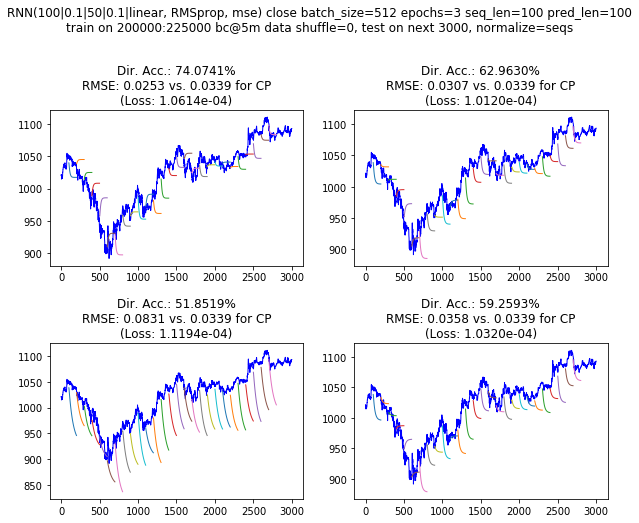

--- 208.464s to run experiment



In [6]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (28000, 1)
train_sz = 25000

seqs ~ (27899, 101, 1)
--- 0.017s to model compilation time


--- Created model id: 140441506073040
Tensor("lstm_9_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________

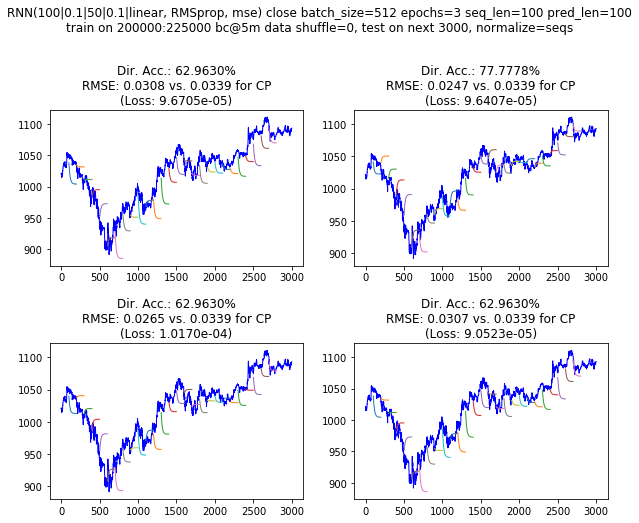

--- 213.408s to run experiment



In [7]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=25000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (53000, 1)
train_sz = 50000

seqs ~ (52899, 101, 1)
--- 0.017s to model compilation time


--- Created model id: 140443472053520
Tensor("lstm_17_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

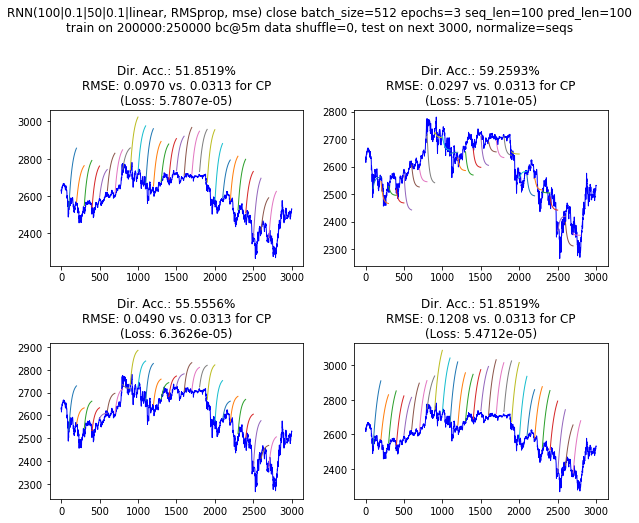

--- 380.981s to run experiment



In [8]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=3,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (53000, 1)
train_sz = 50000

seqs ~ (52899, 101, 1)
--- 0.017s to model compilation time


--- Created model id: 140440743342416
Tensor("lstm_25_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

--- 173.286s to train model

--- 7.148s to walk and predict

### pred_seqs: len=27, shape=(100,)
--- 0.034s to plot incremental predictions



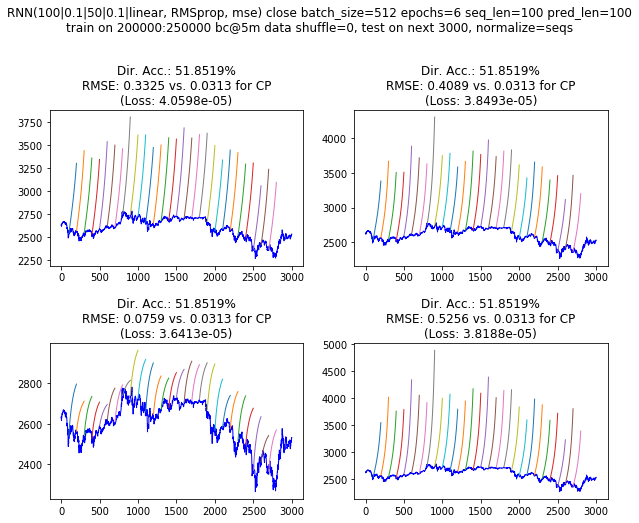

--- 721.854s to run experiment



In [9]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=6,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (53000, 1)
train_sz = 50000

seqs ~ (52899, 101, 1)
--- 0.018s to model compilation time


--- Created model id: 140440745901584
Tensor("lstm_33_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_33 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_34 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

Train on 47404 samples, validate on 2495 samples
Epoch 1/10
47404/47404 [==============================] - 32s 677us/step - loss: 1.8623e-04 - val_loss: 2.0094e-04
Epoch 2/10
47404/47404 [==============================] - 28s 601us/step - loss: 8.3304e-05 - val_loss: 1.1440e-04
Epoch 3/10
47404/47404 [==============================] - 28s 589us/step - loss: 6.1773e-05 - val_loss: 6.4239e-05
Epoch 4/10
47404/47404 [==============================] - 28s 590us/step - loss: 5.1173e-05 - val_loss: 5.3224e-05
Epoch 5/10
47404/47404 [==============================] - 28s 599us/step - loss: 4.6015e-05 - val_loss: 4.5905e-05
Epoch 6/10
47404/47404 [==============================] - 28s 595us/step - loss: 3.9386e-05 - val_loss: 1.0679e-04
Epoch 7/10
47404/47404 [==============================] - 28s 585us/step - loss: 3.6184e-05 - val_loss: 6.0960e-05
Epoch 8/10
47404/47404 [==============================] - 29s 605us/step - loss: 3.2937e-05 - val_loss: 5.4006e-05
Epoch 9/10
47404/47404 [=======

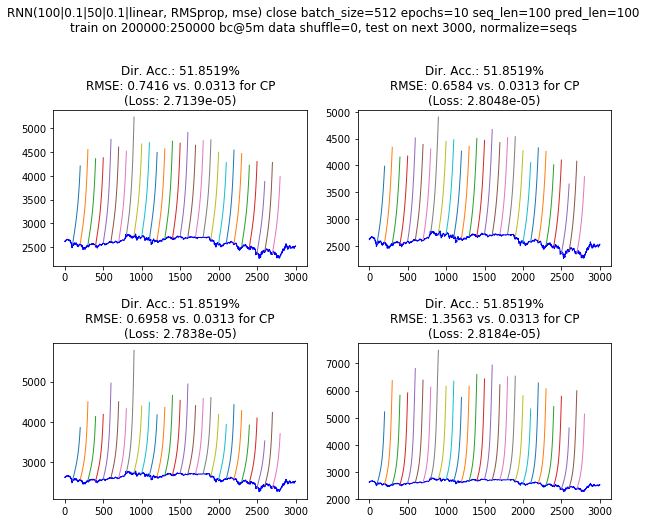

--- 1181.316s to run experiment



In [10]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.1, 50, 0.1]),
        # training:
        epochs=10,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (53000, 1)
train_sz = 50000

seqs ~ (52899, 101, 1)
--- 0.017s to model compilation time


--- Created model id: 140440664626896
Tensor("lstm_41_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_41 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

Train on 47404 samples, validate on 2495 samples
Epoch 1/10
47404/47404 [==============================] - 33s 689us/step - loss: 1.8819e-04 - val_loss: 1.8044e-04
Epoch 2/10
47404/47404 [==============================] - 28s 581us/step - loss: 8.9581e-05 - val_loss: 1.5001e-04
Epoch 3/10
47404/47404 [==============================] - 28s 588us/step - loss: 6.0795e-05 - val_loss: 6.4107e-05
Epoch 4/10
47404/47404 [==============================] - 28s 590us/step - loss: 5.3822e-05 - val_loss: 4.3088e-05
Epoch 5/10
47404/47404 [==============================] - 28s 586us/step - loss: 4.6841e-05 - val_loss: 5.9625e-05
Epoch 6/10
47404/47404 [==============================] - 28s 600us/step - loss: 3.8567e-05 - val_loss: 7.1576e-05
Epoch 7/10
47404/47404 [==============================] - 28s 592us/step - loss: 3.8939e-05 - val_loss: 3.8719e-05
Epoch 8/10
47404/47404 [==============================] - 28s 591us/step - loss: 3.7371e-05 - val_loss: 4.5682e-05
Epoch 9/10
47404/47404 [=======

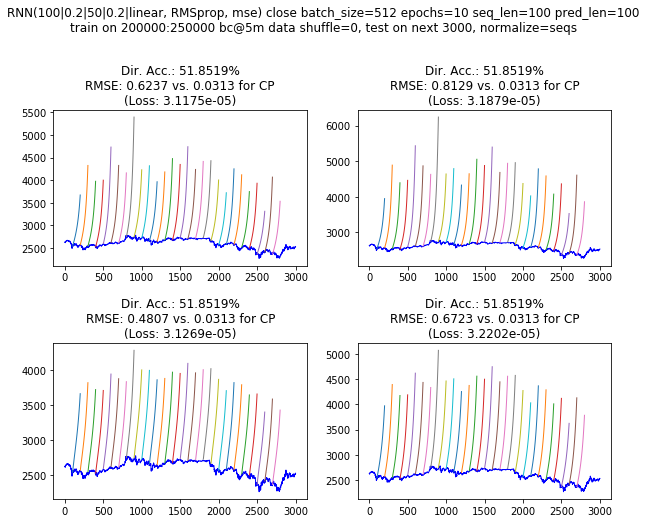

--- 1180.739s to run experiment



In [11]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.2, 50, 0.2]),
        # training:
        epochs=10,
        batch_size=512,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )

data ~ (53000, 1)
train_sz = 50000

seqs ~ (52899, 101, 1)
--- 0.018s to model compilation time


--- Created model id: 140440579725968
Tensor("lstm_49_input:0", shape=(?, 100, 1), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_49 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_50 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
________

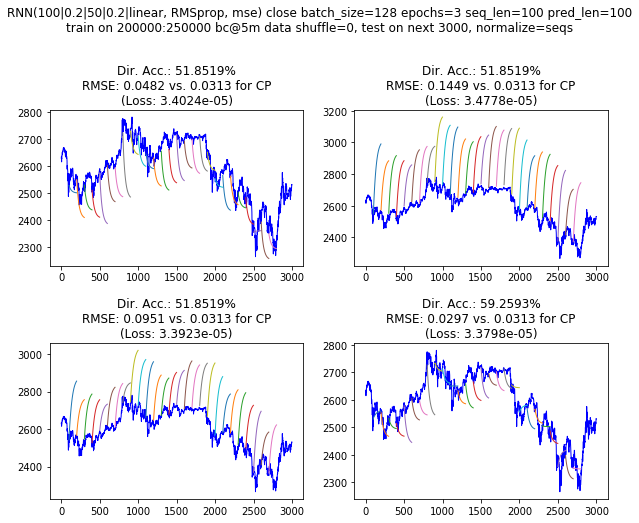

--- 1403.123s to run experiment



In [12]:
with timing('run experiment'):
    run_walk_forward_validation_rnn(
        # data to extract:
        data5m,
        features=['close'],
        from_i=200000,
        train_sz=50000,
        test_sz=3000,
        # data processing:
        normalize='seqs',  # 'seqs' | 'data'
        detrend=False,
        # model and prediction arrangement:
        seq_len=100,
        pred_len=100,
        model_maker=make_rnn_model_constructor([100, 0.2, 50, 0.2]),
        # training:
        epochs=3,
        batch_size=128,
        shuffle=False,
        # experiment setup:
        times=4,
        skip=True,
        fix_all_rngs_to=False,
        fix_rngs_before_each=False,
        # plotting:
        fig_size=(10, 8),
        fast=True,
    )